[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/solita-jkhaak/2021-digitraffic-dev-day/blob/main/requests-example.ipynb)

# Creating simple request

In [1]:
import requests

TMS_STATION_URL = 'https://tie.digitraffic.fi/api/v1/data/tms-data'

In [2]:
headers = {'Digitraffic-User': 'Junamies/FoobarApp 1.0'}

r = requests.get(TMS_STATION_URL, headers=headers)
r.json()['dataUpdatedTime']

'2021-08-25T08:03:31Z'

TMS data can be loaded into pandas for further inspection

In [3]:
import pandas as pd

df = pd.json_normalize(r.json()['tmsStations'], 'sensorValues', ['id', 'tmsNumber', 'measuredTime'], 'station_')
df['measuredTime'] = df.measuredTime.apply(pd.to_datetime)
df

,id,roadStationId,name,oldName,shortName,sensorValue,sensorUnit,timeWindowStart,timeWindowEnd,measuredTime,station_id,station_tmsNumber,station_measuredTime
0,5055,23001,OHITUKSET_60MIN_KIINTEA_SUUNTA2,ohitukset_60min_kiintea_suunta2,kpl/h2,404.0,kpl/h,2021-08-25T07:00:00Z,2021-08-25T08:00:00Z,2021-08-25 08:03:30+00:00,23001,1,2021-08-25T08:03:30Z
1,5116,23001,OHITUKSET_5MIN_LIUKUVA_SUUNTA1,trafficVolume1,kpl/h1,336.0,kpl/h,NaN,NaN,2021-08-25 08:03:30+00:00,23001,1,2021-08-25T08:03:30Z
2,5158,23001,KESKINOPEUS_5MIN_LIUKUVA_SUUNTA1_VVAPAAS1,keskinopeus_5min_liukuva_suunta1_VVAPAAS1,LTila1,91.0,***,NaN,NaN,2021-08-25 08:03:30+00:00,23001,1,2021-08-25T08:03:30Z
3,5057,23001,KESKINOPEUS_60MIN_KIINTEA_SUUNTA2,keskinopeus_60min_kiintea_suunta2,km/h2,100.0,km/h,2021-08-25T07:00:00Z,2021-08-25T08:00:00Z,2021-08-25 08:03:30+00:00,23001,1,2021-08-25T08:03:30Z
4,5064,23001,OHITUKSET_5MIN_KIINTEA_SUUNTA1_MS1,ohitukset_5min_kiintea_suunta1_MS1,MTil1,14.0,***,2021-08-25T07:55:00Z,2021-08-25T08:00:00Z,2021-08-25 08:03:30+00:00,23001,1,2021-08-25T08:03:30Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8668,5056,24607,KESKINOPEUS_60MIN_KIINTEA_SUUNTA1,keskinopeus_60min_kiintea_suunta1,km/h1,101.0,km/h,NaN,NaN,2021-08-25 06:00:00+00:00,24607,1607,2021-08-25T07:54:00Z
8669,5054,24607,OHITUKSET_60MIN_KIINTEA_SUUNTA1,ohitukset_60min_kiintea_suunta1,kpl/h1,392.0,kpl/h,NaN,NaN,2021-08-25 06:00:00+00:00,24607,1607,2021-08-25T07:54:00Z
8670,5061,24607,KESKINOPEUS_5MIN_KIINTEA_SUUNTA2_VVAPAAS2,keskinopeus_5min_kiintea_suunta2_VVAPAAS2,LTil2,100.0,***,NaN,NaN,2021-08-25 07:45:00+00:00,24607,1607,2021-08-25T07:54:00Z
8671,5119,24607,OHITUKSET_5MIN_LIUKUVA_SUUNTA2,trafficVolume2,kpl/h2,624.0,kpl/h,NaN,NaN,2021-08-25 07:54:00+00:00,24607,1607,2021-08-25T07:54:00Z


# Weather camera with ETags

First do request without ETag (or use empty string). Server will respond with ETag value, which should be used for subsequent requests up until data changes on the server side.

In [4]:
from IPython.display import Image
WEATHER_URL = 'https://weathercam.digitraffic.fi/C0450701.jpg'

picture = None
req = None

# req = requests.get(WEATHER_URL, headers=headers)



Last modified: Wed, 25 Aug 2021 07:55:57 GMT


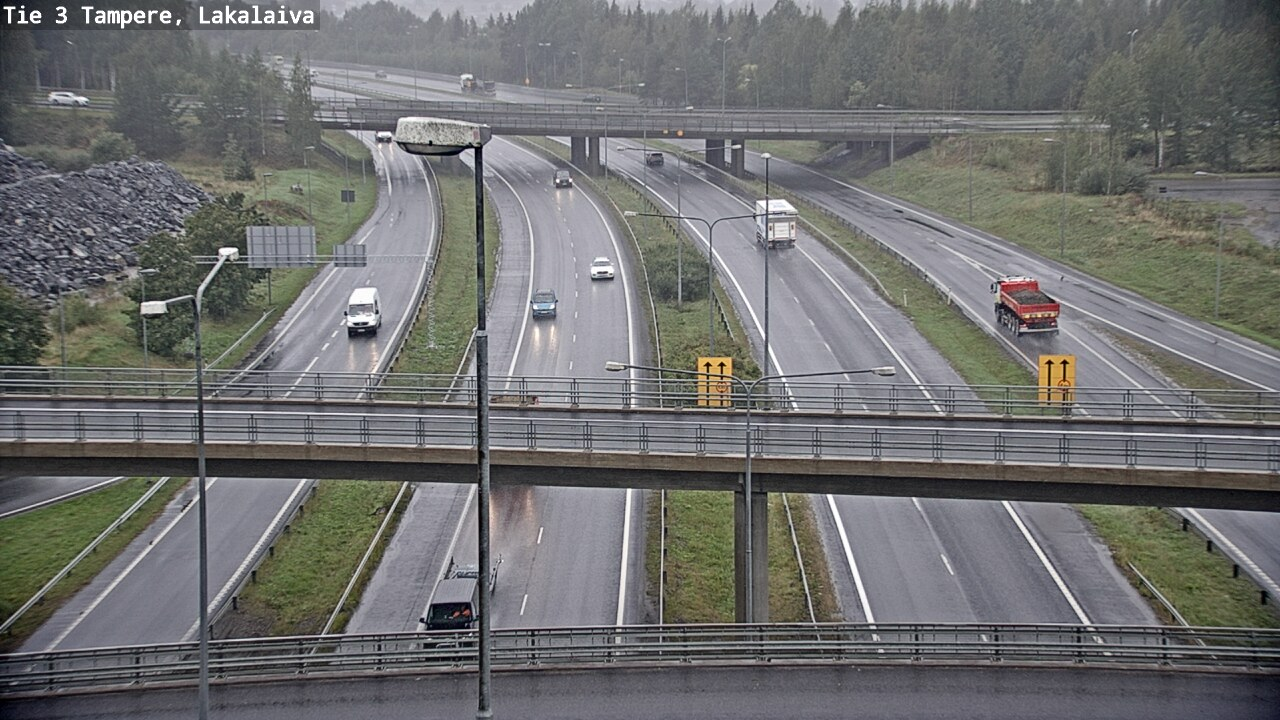

In [5]:
# rerunning after five minutes, will update the picture

headers = {
    'Digitraffic-User': 'Junamies/FoobarApp 1.0',
    'If-None-Match': "" if req is None else req.headers['ETag']
}

req = requests.get(WEATHER_URL, headers=headers)

if req.status_code == 200:
    picture = req.content
else:
    print("Show old picture")

print("Last modified: {}".format(req.headers['X-Amz-Meta-Last-Modified']))
Image(data=picture)